In [1]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

import locale
locale.setlocale(locale.LC_ALL, 'de_DE.utf8')
plt.rcParams['axes.formatter.use_locale'] = True

In [2]:
f = pm.ferh_fm_zeynab()
f.df

,set,obj,wavelength,flags,sample_rotation,hext
0,0460_L,<pymolzilla.processing.file_import.SetRotmld o...,460,L,0,50
1,0530_L,<pymolzilla.processing.file_import.SetRotmld o...,530,L,0,50
2,0620_L,<pymolzilla.processing.file_import.SetRotmld o...,620,L,0,50
3,0710_H,<pymolzilla.processing.file_import.SetRotmld o...,710,H,0,207
4,0710_L,<pymolzilla.processing.file_import.SetRotmld o...,710,L,0,50
5,0810_L,<pymolzilla.processing.file_import.SetRotmld o...,810,L,0,50
6,0920_L,<pymolzilla.processing.file_import.SetRotmld o...,920,L,0,50
7,1050_H,<pymolzilla.processing.file_import.SetRotmld o...,1050,H,0,207
8,1050_L,<pymolzilla.processing.file_import.SetRotmld o...,1050,L,0,50
9,1200_L,<pymolzilla.processing.file_import.SetRotmld o...,1200,L,0,50


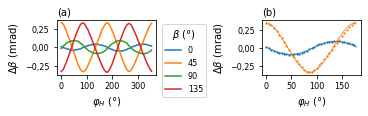

In [10]:
ms = 2.5
lw = 0.8
mk = '.'

g = f[13]
g.load()

for gg in g:
    gg.preprocess(symmetrize_h = False)


g.collect_merge()

# kresleni
##########

fig, (ax, ax2) = plt.subplots(1,2, figsize=(5,1.5), constrained_layout=True)
phih = g.data['phih']

ax.plot(phih, g.data[0.], color='C0', label='0')
ax.plot(phih, g.data[45.], color='C1', label='45')
ax.plot(phih, g.data[90.], color='C2', label='90')
ax.plot(phih, g.data[135.], color='C3', label='135')

ax.legend(title=r'$\beta$ ($\degree$)', bbox_to_anchor=(1.02,1))
ax.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax.set_ylabel(r'$\Delta\beta$ (mrad)')
ax.text(0, 1.1, "(a)", transform=ax.transAxes)

# druhy graf
######
g = f[13]
g.load()
g.preprocess()
g.collect_merge()
g.symmetrize_beta()
g.fourier2_beta()
g.analyze()

phih = g.data['phih']

ax2.plot(phih, g.data[0.], mk, color='C0', markersize=ms, label='0')
ax2.plot(phih, g.data[45.], mk, color='C1', markersize=ms, label='45')

ax2.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax2.set_ylabel(r'$\Delta\beta$ (mrad)')
ax2.text(0, 1.1, "(b)", transform=ax2.transAxes)


phihdense = np.linspace(0,180,num=50)
phimdense = np.array(g.fit_anisotropy.free_energy.phih2phim(np.radians(phihdense), hext=207))
df = pd.DataFrame({'phih':phihdense,'phim':phimdense})

c2m = np.cos(2*phimdense)
s2m = np.sin(2*phimdense)

ax2.plot(phihdense, g.fit_anisotropy.pmldfit.results[0].params[0]
         +c2m*g.fit_anisotropy.pmldfit.results[0].params[1]
         +s2m*g.fit_anisotropy.pmldfit.results[0].params[2],
         color='C0', linewidth=lw)
ax2.plot(phihdense, g.fit_anisotropy.pmldfit.results[1].params[0]
         +c2m*g.fit_anisotropy.pmldfit.results[1].params[1]
         +s2m*g.fit_anisotropy.pmldfit.results[1].params[2],
         color='C1', linewidth=lw)

fig.savefig('out/ferh-data.pdf')